# Step1. Install the necessary tools for collecting sample points

In [ ]:
! pip install osmnx

In [ ]:
! pip install matplotlib_scalebar

In [ ]:
! pip install contextily

In [ ]:
import csv
import math

import osmnx as ox
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

from matplotlib_scalebar.scalebar import ScaleBar
from shapely.geometry import LineString,Point
from shapely.geometry import Polygon

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step2. Get the shapefile of research area with 40 LSOAs in London and plot the street network

In [ ]:
# install the shape file of London
sf = "/content/drive/MyDrive/GEOG0105/Research_Area/research_area.shp"
gdf = gpd.read_file(sf)

In [ ]:
gdf

lsoa21cd             lsoa21nm   msoa21cd            msoa21nm    lad22cd  \
0   E01000853          Camden 029H  E02007115          Camden 029  E09000007   
1   E01000919          Camden 028D  E02000193          Camden 028  E09000007   
2   E01000916          Camden 027B  E02000192          Camden 027  E09000007   
3   E01000918          Camden 028C  E02000193          Camden 028  E09000007   
4   E01000851          Camden 026B  E02000191          Camden 026  E09000007   
5   E01000850          Camden 026A  E02000191          Camden 026  E09000007   
6   E01000855          Camden 028A  E02000193          Camden 028  E09000007   
7   E01000914          Camden 028B  E02000193          Camden 028  E09000007   
8   E01000005  City of London 001E  E02000001  City of London 001  E09000001   
9   E01000002  City of London 001B  E02000001  City of London 001  E09000001   
10  E01032740  City of London 001G  E02000001  City of London 001  E09000001   
11  E01032739  City of London 001F  E02000001  City of London 001  E09000001   
12  E01004684     Westminster 015C  E02000974     Westminster 015  E09000033   
13  E01004680     Westminster 015A  E02000974     Westminster 015  E09000033   
14  E01004660     Westminster 008B  E02000967     Westminster 008  E09000033   
15  E01004659     Westminster 008A  E02000967     Westminster 008  E09000033   
16  E01004682     Westminster 016B  E02000975     Westminster 016  E09000033   
17  E01004715     Westminster 013A  E02000972     Westminster 013  E09000033   
18  E01004657     Westminster 012A  E02000971     Westminster 012  E09000033   
19  E01004663     Westminster 012E  E02000971     Westminster 012  E09000033   
20  E01004717     Westminster 011D  E02000970     Westminster 011  E09000033   
21  E01004662     Westminster 012D  E02000971     Westminster 012  E09000033   
22  E01004661     Westminster 012C  E02000971     Westminster 012  E09000033   
23  E01004658     Westminster 012B  E02000971     Westminster 012  E09000033   
24  E01004716     Westminster 011C  E02000970     Westminster 011  E09000033   
25  E01033594     Westminster 015G  E02000974     Westminster 015  E09000033   
26  E01004713     Westminster 011A  E02000970     Westminster 011  E09000033   
27  E01004714     Westminster 011B  E02000970     Westminster 011  E09000033   
28  E01004765     Westminster 013D  E02000972     Westminster 013  E09000033   
29  E01004762     Westminster 011E  E02000970     Westminster 011  E09000033   
30  E01004734     Westminster 018A  E02000977     Westminster 018  E09000033   
31  E01004763     Westminster 013B  E02000972     Westminster 013  E09000033   
32  E01004735     Westminster 018B  E02000977     Westminster 018  E09000033   
33  E01004761     Westminster 018D  E02000977     Westminster 018  E09000033   
34  E01035716     Westminster 013G  E02000972     Westminster 013  E09000033   
35  E01004736     Westminster 018C  E02000977     Westminster 018  E09000033   
36  E01002701       Islington 023A  E02000576       Islington 023  E09000019   
37  E01033489       Islington 022G  E02000575       Islington 022  E09000019   
38  E01002724       Islington 022D  E02000575       Islington 022  E09000019   
39  E01002704       Islington 023D  E02000576       Islington 023  E09000019   

           lad22nm                                           geometry  
0           Camden  POLYGON ((-0.12306 51.52493, -0.12303 51.52486...  
1           Camden  POLYGON ((-0.12684 51.51735, -0.12684 51.51733...  
2           Camden  POLYGON ((-0.10936 51.52292, -0.10932 51.52291...  
3           Camden  POLYGON ((-0.12282 51.51826, -0.1228 51.51825,...  
4           Camden  POLYGON ((-0.1408 51.52434, -0.14074 51.52428,...  
5           Camden  POLYGON ((-0.13 51.52246, -0.12966 51.52216, -...  
6           Camden  POLYGON ((-0.13059 51.52463, -0.13047 51.52452...  
7           Camden  POLYGON ((-0.12079 51.52322, -0.12046 51.52269...  
8   City of London  POLYGON ((-0.07571 51.51575, -0.07542 51.51555...  
9   

In [ ]:
print(gdf.crs)

EPSG:4326


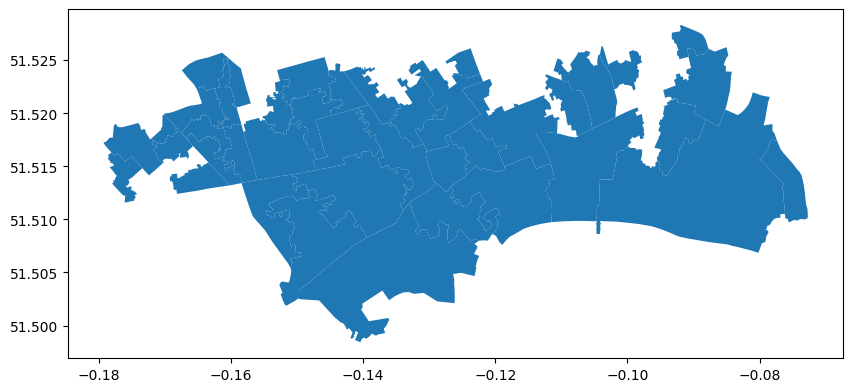

In [ ]:
ax = gdf.plot(figsize=(10, 10))
plt.show()

In [ ]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lsoa21cd  40 non-null     object  
 1   lsoa21nm  40 non-null     object  
 2   msoa21cd  40 non-null     object  
 3   msoa21nm  40 non-null     object  
 4   lad22cd   40 non-null     object  
 5   lad22nm   40 non-null     object  
 6   geometry  40 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 2.3+ KB


In [ ]:
# get the boudary to ensure the dist in street network
gdf = gpd.read_file(sf).to_crs(epsg=4326)
area_polygon = gdf.union_all()

In [ ]:
G = ox.graph_from_polygon(area_polygon, network_type='walk')

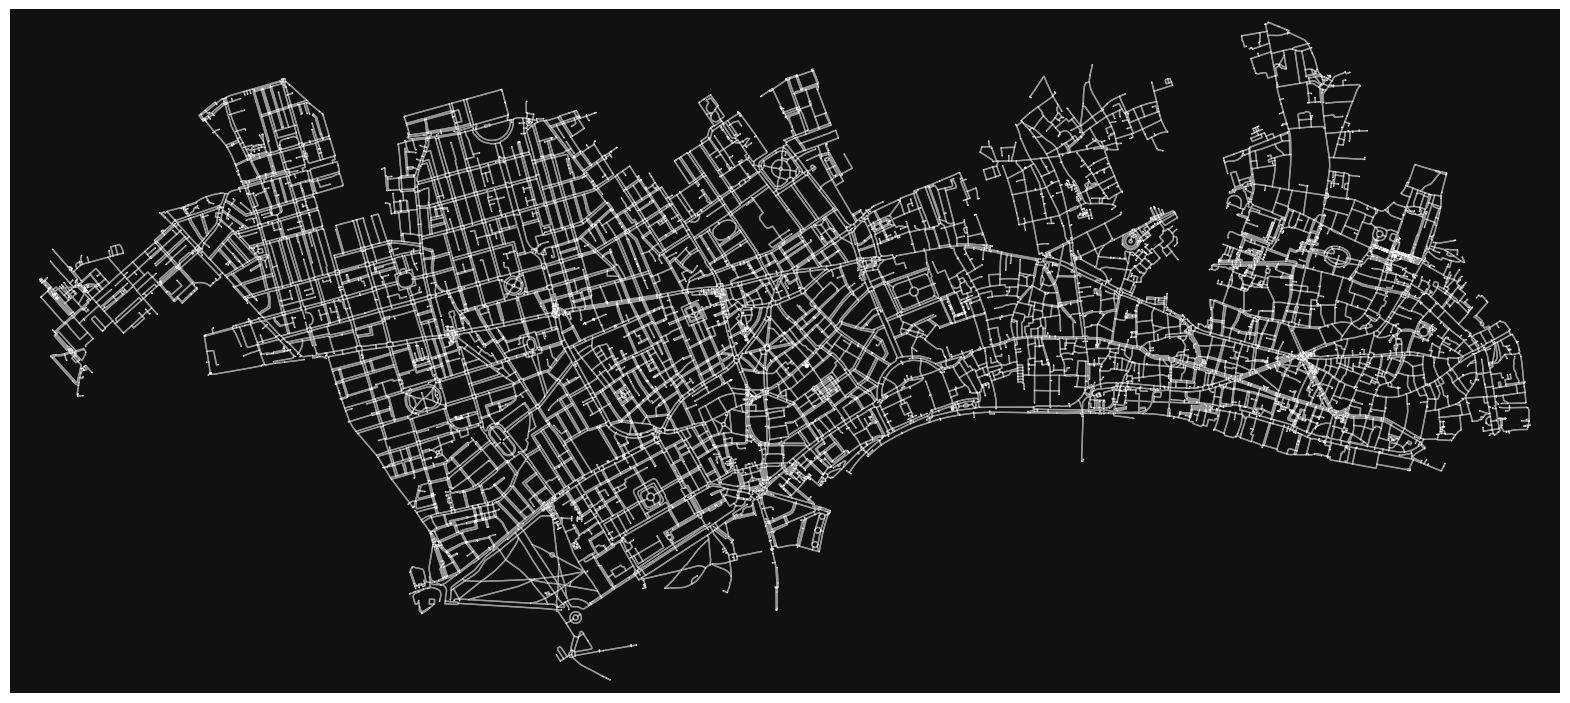

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(G, node_size=1, figsize=(20, 20))

# Step3. Get the midpoints from the edges and show it on the street network

In [ ]:
# get information of each edge
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

In [ ]:
# get centroid of each edge
edges['midpoint'] = ''
for i in range(0,len(edges)):
    midpoint = edges['geometry'].iloc[i].interpolate(0.5, normalized = True)
    edges['midpoint'].iloc[i] = midpoint

/tmp/ipython-input-34-3484703986.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges['midpoint'].iloc[i] = midpoint
/tmp/ipython-input-34-3484703986.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [ ]:
print(f"{edges['midpoint'].notnull().sum()} central points")

36348 central points


In [ ]:
# Create a legend for the graph
legend_labels = ['Nodes', 'Centroids']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Nodes'),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Centroids')]

# Visualize centroids and edges
fig, ax = ox.plot_graph(G, node_size=2, figsize=(48, 48), node_color='r', show=False, close=False)

for i in range(len(edges)):
    ax.scatter(edges['midpoint'].iloc[i].x, edges['midpoint'].iloc[i].y, c='g', s=2)

# Add the legend to the plot
ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right', framealpha=0.5, fontsize='large')

for text in ax.legend_.get_texts():
    text.set_fontsize(1.5 * text.get_fontsize())

# Show the plot
plt.show()

KeyboardInterrupt: 

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

midpoint_gdf = gpd.GeoDataFrame(edges.copy(), geometry='midpoint', crs='EPSG:4326')

if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

joined_gdf_candidate = gpd.sjoin(
    midpoint_gdf,
    gdf[['geometry', 'lsoa21cd', 'lsoa21nm', 'msoa21nm', 'lad22nm']],
    how="left",
    predicate="within"
)

joined_gdf_candidate['longitude'] = joined_gdf_candidate.geometry.x
joined_gdf_candidate['latitude'] = joined_gdf_candidate.geometry.y

joined_gdf_candidate.reset_index(drop=True, inplace=True)
joined_gdf_candidate['id'] = joined_gdf_candidate.index

final_candidate_points = joined_gdf_candidate[[
    'id', 'latitude', 'longitude',
    'lsoa21cd', 'lsoa21nm','msoa21nm','lad22nm'
]]

final_candidate_points.to_csv("/content/drive/MyDrive/GEOG0105/sample_points_1/candidate_points_fullinfo.csv", index=False)

print(final_candidate_points)

          id   latitude  longitude   lsoa21cd             lsoa21nm  \
0          0  51.523786  -0.145131  E01004715     Westminster 013A   
1          1  51.522314  -0.144405  E01004715     Westminster 013A   
2          2  51.516806  -0.152179  E01004714     Westminster 011B   
3          3  51.516437  -0.152846  E01004714     Westminster 011B   
4          4  51.517044  -0.152314  E01004714     Westminster 011B   
...      ...        ...        ...        ...                  ...   
36343  36343  51.519126  -0.089462  E01000002  City of London 001B   
36344  36344  51.519115  -0.089555  E01000002  City of London 001B   
36345  36345  51.517263  -0.122151  E01000918          Camden 028C   
36346  36346  51.517329  -0.121822  E01000918          Camden 028C   
36347  36347  51.517127  -0.121752  E01000918          Camden 028C   

                 msoa21nm         lad22nm  
0         Westminster 013     Westminster  
1         Westminster 013     Westminster  
2         Westminster 011  

# Step4. Get the selected points by sampling in different LSOAs

Points are allocated and taken according to the point ratio of different LSOAs. Points below 250 are retained.

In [ ]:
lsoa_counts = final_candidate_points.groupby('lsoa21cd').size().reset_index(name='num_points')
lsoa_counts = lsoa_counts.sort_values(by='num_points', ascending=False)
lsoa_counts['proportion'] = lsoa_counts['num_points'] / lsoa_counts['num_points'].sum()
print(lsoa_counts)

     lsoa21cd  num_points  proportion
35  E01032739        7180    0.197687
30  E01004736        2932    0.080727
39  E01035716        2468    0.067952
36  E01032740        1920    0.052863
31  E01004761        1674    0.046090
28  E01004734        1602    0.044108
29  E01004735        1356    0.037335
6   E01000914        1284    0.035352
33  E01004763        1260    0.034692
24  E01004714        1054    0.029020
9   E01000919         970    0.026707
0   E01000002         948    0.026101
32  E01004762         928    0.025551
34  E01004765         894    0.024615
5   E01000855         768    0.021145
8   E01000918         604    0.016630
1   E01000005         594    0.016355
38  E01033594         564    0.015529
11  E01002704         562    0.015474
12  E01002724         560    0.015419
17  E01004661         530    0.014593
3   E01000851         502    0.013822
2   E01000850         500    0.013767
23  E01004713         468    0.012885
15  E01004659         396    0.010903
18  E0100466

In [ ]:
# Seperate LSOAs into low density (< 250 points) and high-density (>= 250 points)
low_density_lsoas = lsoa_counts[lsoa_counts['num_points'] < 250]
high_density_lsoas = lsoa_counts[lsoa_counts['num_points'] >= 250]

In [ ]:
# Keep all points in low-density LSOAs
low_density_points = final_candidate_points[final_candidate_points['lsoa21cd'].isin(low_density_lsoas['lsoa21cd'])]

# Calculate how many more points are needed to reach a total of 4000
remaining_quota = 4000 -len(low_density_points)

# Prepare high-density LSOA data for proportional sampling
high_density_total_points = final_candidate_points[final_candidate_points['lsoa21cd'].isin(high_density_lsoas['lsoa21cd'])]
high_density_lsoa_counts = high_density_total_points.groupby('lsoa21cd').size().reset_index(name = 'count')

# Compute number of points to sample for each high-density LSOA, proportionally
high_density_lsoa_counts['allocated'] = (
    high_density_lsoa_counts['count'] / high_density_lsoa_counts['count'].sum() * remaining_quota
).round().astype(int)

# Sample points for each high-density LSOA
sampled_high_density_points = pd.DataFrame()
for _, row in high_density_lsoa_counts.iterrows():
    lsoa_id = row['lsoa21cd']
    n = row['allocated']
    subset = final_candidate_points[final_candidate_points['lsoa21cd'] == lsoa_id]
    if len(subset) <= n:
        sampled = subset
    else:
        sampled = subset.sample(n, random_state=42)
    sampled_high_density_points = pd.concat([sampled_high_density_points, sampled], ignore_index=True)

# Combine low-density and sampled high-density points
sample_points = pd.concat([low_density_points,sampled_high_density_points], ignore_index=True)

# Print summary
print(f"Low-density LSOA points retained: {len(low_density_points)}")
print(f"High-density LSOA points sampled: {len(sampled_high_density_points)}")

Low-density LSOA points retained: 1258
High-density LSOA points sampled: 2741


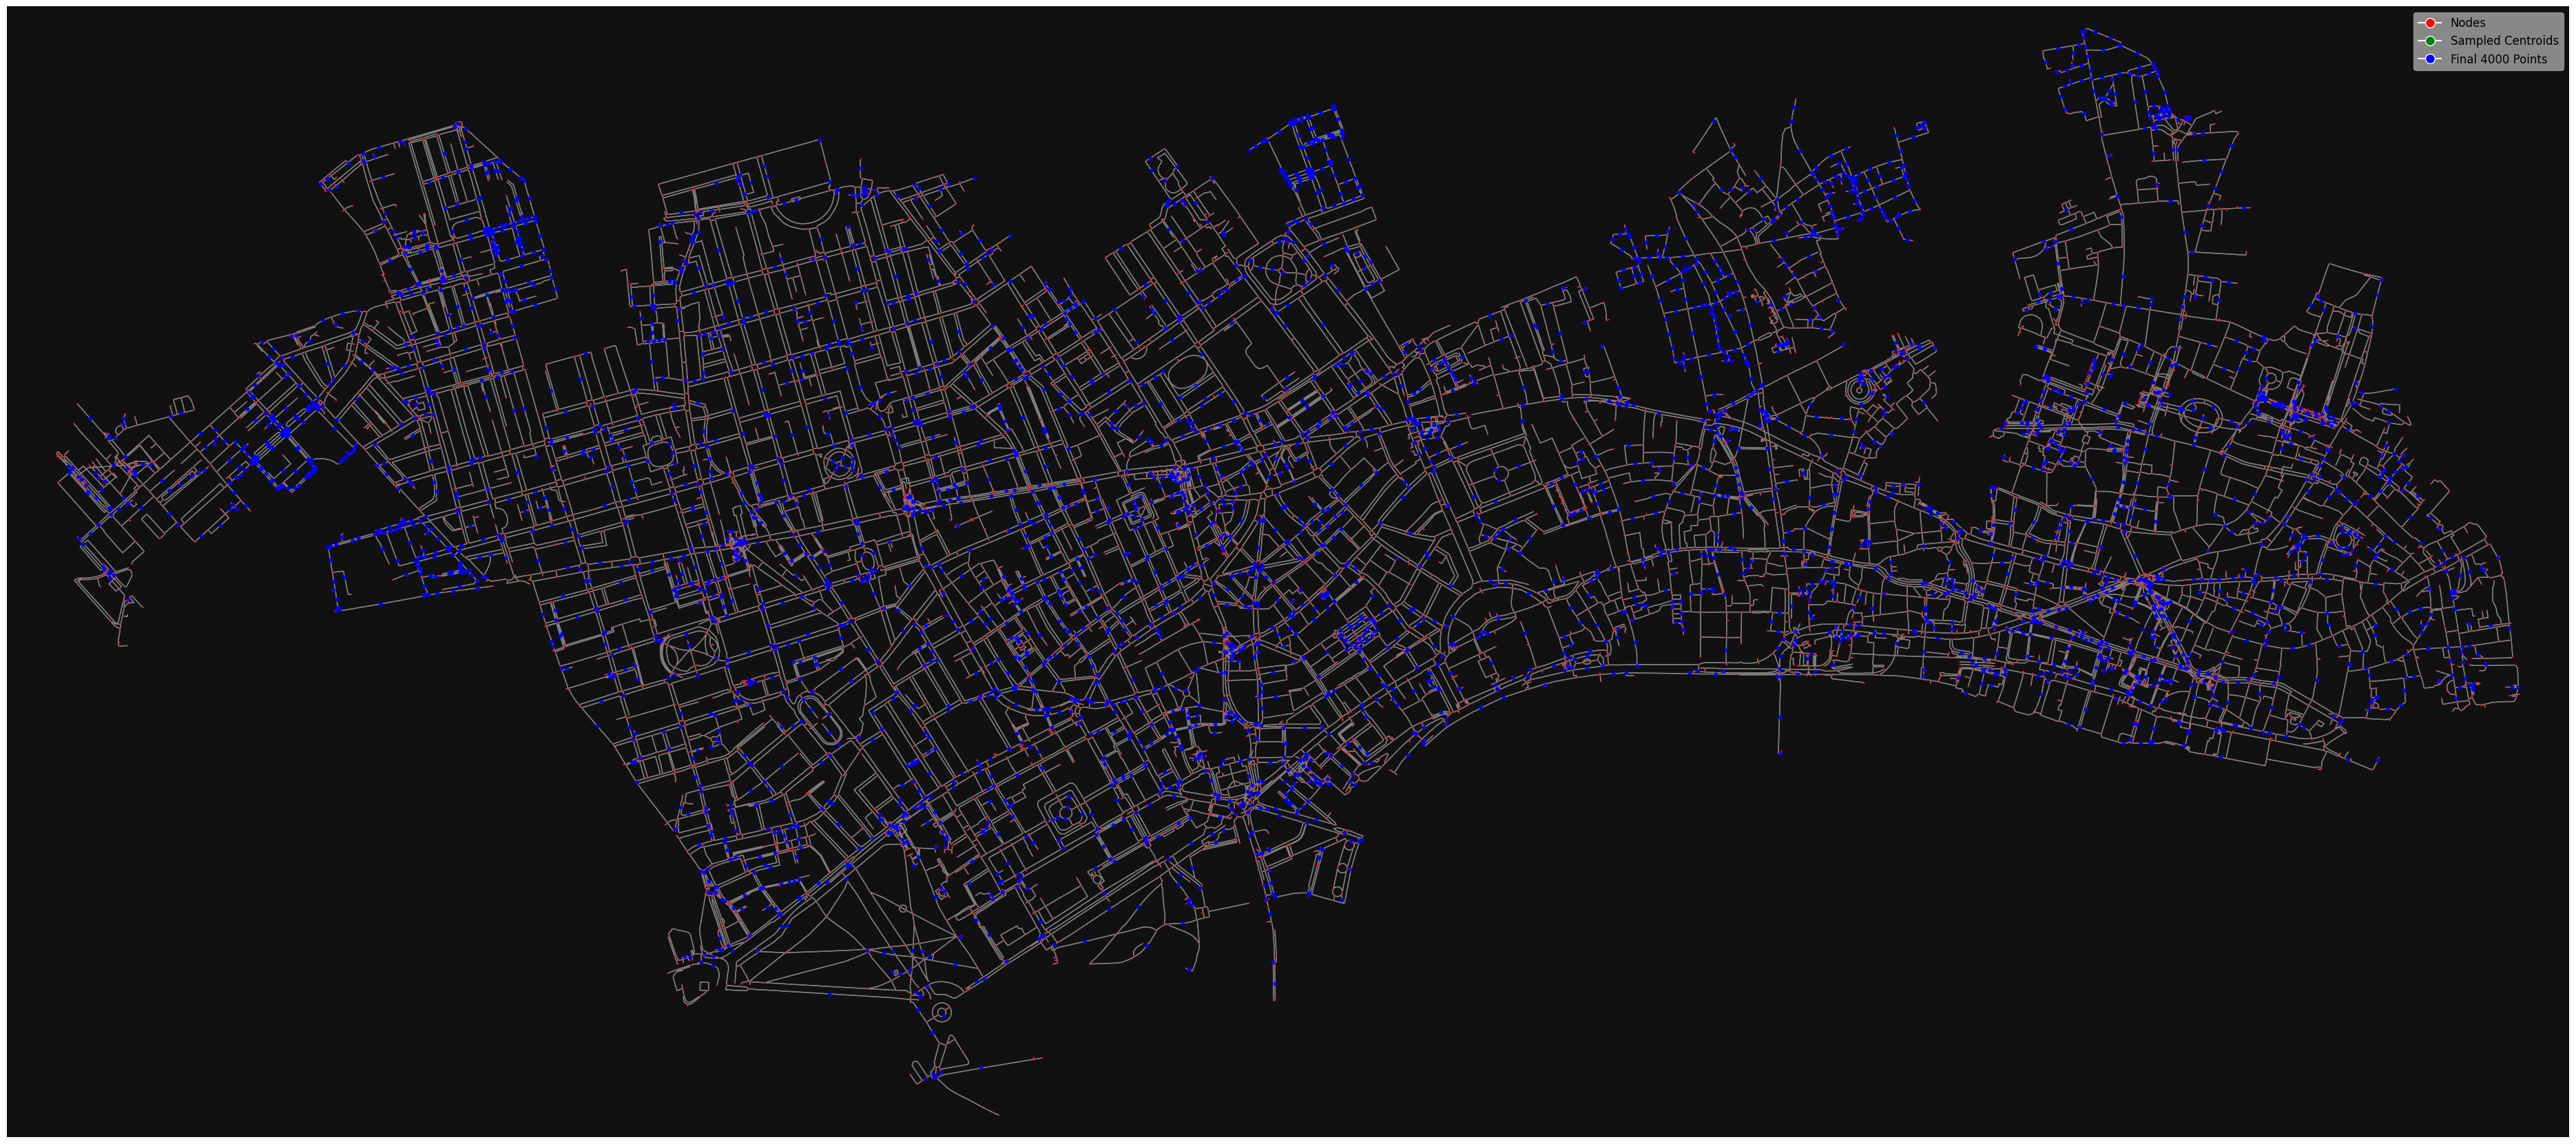

In [ ]:
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point

# Convert sample_points (DataFrame) to GeoDataFrame with Point geometry
gdf_sample = gpd.GeoDataFrame(
    sample_points,
    geometry=gpd.points_from_xy(sample_points['longitude'], sample_points['latitude']),
    crs='EPSG:4326'
)

# Create legend labels and handels
legend_labels = ['Nodes', 'Sampled Centroids', 'Final 400 Points']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Nodes'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Sampled Centroids'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Final 4000 Points')
]

# Plot base street network
fig, ax = ox.plot_graph(G, node_size=2, node_color='r', edge_color='grey',
                        figsize=(48, 48), show=False, close=False)

# Plot final 4000 points in blue
gdf_sample.plot(ax=ax, color='blue', markersize=10)

# Add legend
ax.legend(handles=legend_handles, loc='upper right', framealpha=0.5, fontsize='large')

# Show plot
plt.show()

In [ ]:
sample_points['bearing'] = 0
sample_points

id   latitude  longitude   lsoa21cd          lsoa21nm  \
0         6  51.514286  -0.166975  E01004680  Westminster 015A   
1         7  51.514314  -0.166932  E01004680  Westminster 015A   
2         8  51.513104  -0.161604  E01004680  Westminster 015A   
3         9  51.513044  -0.162275  E01004680  Westminster 015A   
4       207  51.523116  -0.101655  E01033489    Islington 022G   
...     ...        ...        ...        ...               ...   
3994  29552  51.510569  -0.137423  E01035716  Westminster 013G   
3995  17034  51.514068  -0.144022  E01035716  Westminster 013G   
3996  29564  51.510393  -0.142550  E01035716  Westminster 013G   
3997  35049  51.510692  -0.135588  E01035716  Westminster 013G   
3998  27341  51.514407  -0.148515  E01035716  Westminster 013G   

             msoa21nm      lad22nm  bearing  
0     Westminster 015  Westminster        0  
1     Westminster 015  Westminster        0  
2     Westminster 015  Westminster        0  
3     Westminster 015  Westminster        0  
4       Islington 022    Islington        0  
...               ...          ...      ...  
3994  Westminster 013  Westminster        0  
3995  Westminster 013  Westminster        0  
3996  Westminster 013  Westminster        0  
3997  Westminster 013  Westminster        0  
3998  Westminster 013  Westminster        0  

[3999 rows x 8 columns]

In [ ]:
sample_points.to_csv('/content/drive/MyDrive/GEOG0105/sample_points_1/midpoints_with_bearings.csv', index=False)

print(sample_points.head())

    id   latitude  longitude   lsoa21cd          lsoa21nm         msoa21nm  \
0    6  51.514286  -0.166975  E01004680  Westminster 015A  Westminster 015   
1    7  51.514314  -0.166932  E01004680  Westminster 015A  Westminster 015   
2    8  51.513104  -0.161604  E01004680  Westminster 015A  Westminster 015   
3    9  51.513044  -0.162275  E01004680  Westminster 015A  Westminster 015   
4  207  51.523116  -0.101655  E01033489    Islington 022G    Islington 022   

       lad22nm  bearing  
0  Westminster        0  
1  Westminster        0  
2  Westminster        0  
3  Westminster        0  
4    Islington        0  


In [ ]:
print(sample_points.isnull().sum())

id           0
latitude     0
longitude    0
lsoa21cd     0
lsoa21nm     0
msoa21nm     0
lad22nm      0
bearing      0
dtype: int64
